In [2]:
class Slider:

    def __init__(self, slider_x, slider_y, slider_w, slider_h, slider_value = 0.5):
        self.s_x = slider_x
        self.s_y = slider_y
        self.s_w = slider_w
        self.s_h = slider_h
        self.s_value = slider_value
        self.s_mouse_over = False
        
    def __repr__(self):
        return f'Slider({self.s_x}, {self.s_y}, {self.s_w}, {self.s_h}, {self.s_value})'
    
    def display(self):
        with push_style():
            stroke(255)
            
            #outside shape
            stroke_weight(3) if self.s_mouse_over else stroke_weight(1)
            no_fill()
            rect(self.s_x, self.s_y, self.s_w, self.s_h)
            
            #content
            fill(255)
            rect(self.s_x, self.s_y, remap(self.s_value, 0, 1, 0, self.s_w), self.s_h)
            
    def mouse_over(self, m_x, m_y):
        if (self.s_x <= m_x <= self.s_x + self.s_w) and (self.s_y <= m_y <= self.s_y + self.s_h):
            self.s_mouse_over = True
        else:
            self.s_mouse_over = False
        return self.s_mouse_over
    
    def clicked(self, m_x, m_y):
        if self.mouse_over(m_x, m_y): # we need to check the current position on the mouse, otherwise we can drag the slider outside of its boundaries
            self.s_value = remap(m_x - self.s_x, 0, self.s_w, 0, 1)
            
    def get_value(self):
        return self.s_value

import os
  
WIDTH = 300
HEIGHT = 120

SLIDER_LENGTH = 100
SLIDER_HEIGHT = 12

slider_list = [Slider(50, 25 + i * 30, 100, 12) for i in range(3)]

def setup():
    size(WIDTH, HEIGHT)
    smooth()
        
    no_loop()

def draw():
    background(0)
    
    for s in slider_list:
        s.display()
        
    with push_style():
        stroke(255)
        col = (remap(slider_list[i].get_value(), 0, 1, 0, 255) for i in range(3))
        fill(*col)
        rect(190, 23, 75, 75)

def mouse_moved():
    for s in slider_list:
        s.mouse_over(mouse_x, mouse_y)
    redraw()

def mouse_pressed():
    for s in slider_list:
        s.clicked(mouse_x, mouse_y)
    redraw()
    
def mouse_dragged():
    for s in slider_list:
        s.clicked(mouse_x, mouse_y)
    redraw()
    
run_sketch()

In [ ]:
save_frame(os.getcwd() + "/sliders_####.png", use_thread=True)

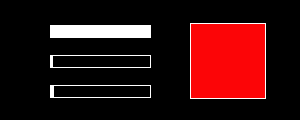